In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
kB = 1.38064852e-23

In [2]:
class IsingModel:

	def __str__(self):
		return f"2D Ising Model with {self.size}x{self.size} spins\nT = {self.temperature} K\nJ = {self.J} Jules\nh = {self.h} Jules\nCurie temperature: {self.calc_curie_temperature()} K"

	def __init__(self, size, temperature, J=1, h=0):
		self.size = size
		self.temperature = temperature
		self.J = J
		self.h = h
		self.spins = np.random.choice([-1, 1], size=(size, size))
	
	def calc_curie_temperature(self):
		return 2 * self.J / (kB * np.log(1 + np.sqrt(2)))

	def calc_energy_change(self, i, j):
		neighbors = (
			self.spins[(i + 1) % self.size, j] +
			self.spins[(i - 1) % self.size, j] +
			self.spins[i, (j + 1) % self.size] +
			self.spins[i, (j - 1) % self.size]
		)
		return 2 * self.J * self.spins[i, j] * neighbors + 2 * self.h * self.spins[i, j]
	
	def metropolis_step(self):
		i, j = np.random.randint(0, self.size, size=2)
		delta_E = self.calc_energy_change(i, j)
		if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / (self.temperature * kB)):
			self.spins[i, j] *= -1
	
	def simulate(self, steps):
		magnetizations = np.zeros(steps)
		for step in range(steps):
			self.metropolis_step()
			mag = np.sum(self.spins) / self.size**2
			magnetizations[step] = mag
			if step % (steps // 10) == 0:
				print(f"Step {step}/{steps} completed.")
		return magnetizations
	
	def animate(self, steps, file_name="ising_model"):
		frames = 150
		fig, ax = plt.subplots(figsize=(6, 6))
		ax.set_title(f"Ising Model at T = " + str(self.temperature) + " K\nand Interaction strenght = " + str(self.J) + " J")
		ax.set_xlim(0, self.size)
		ax.set_ylim(0, self.size)
		im = ax.imshow(self.spins, cmap="spring", vmin=-1, vmax=1)
		fig.colorbar(im, ax=ax, label='Spin')

		
		def update(frame):
			for _ in range(steps // frames):
				self.metropolis_step()
			im.set_array(self.spins)
			return [im]
		
		anim = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)
		anim.save(file_name + ".gif", fps=30)
		plt.close()

	def plot_magnetization(self, steps):
		magnetizations = self.simulate(steps)
		fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

		ax1.plot(magnetizations, color="blue")
		ax1.set_title("Magnetization")
		ax1.set_xlabel("Step")
		ax1.set_ylabel("Magnetization per spin")

		cax = ax2.imshow(self.spins, cmap="spring", vmin=-1, vmax=1)
		ax2.set_title("Final spin configuration")
		fig.colorbar(cax, ax=ax2, label='Spin')

		plt.tight_layout()
		plt.show()

Experiment 1:

Temperature = 25 Celsius

2D Ising Model with 100x100 spins
T = 298 K
J = 3e-21 Jules
h = 0 Jules
Curie temperature: 493.0694412100675 K
Step 0/1000000 completed.
Step 100000/1000000 completed.
Step 200000/1000000 completed.
Step 300000/1000000 completed.
Step 400000/1000000 completed.
Step 500000/1000000 completed.
Step 600000/1000000 completed.
Step 700000/1000000 completed.
Step 800000/1000000 completed.
Step 900000/1000000 completed.


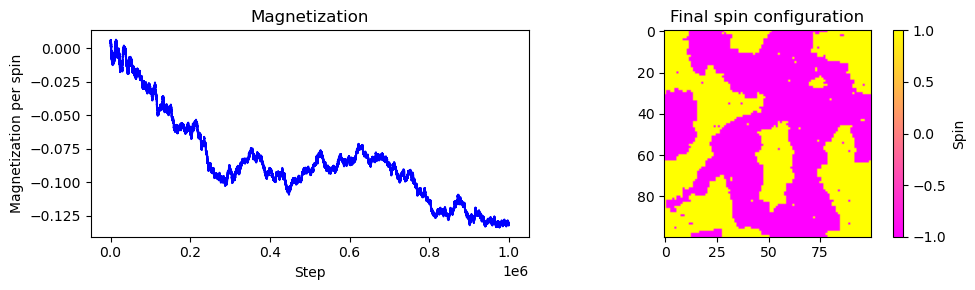

In [3]:
steps = 1000000
size = 100
j = 3e-21
h = 0
temperature = 298 # 25 Celsius
model = IsingModel(size, temperature)
model.J = j
model.h = h
print(model)

model.animate(steps, "ising_model_1")

model = IsingModel(size, temperature)
model.J = j
model.h = h
model.plot_magnetization(steps)


Experiment 2:

Temperature = Curie Temperature

2D Ising Model with 100x100 spins
T = 493.0694412100675 K
J = 3e-21 Jules
h = 0 Jules
Curie temperature: 493.0694412100675 K
Step 0/1000000 completed.
Step 100000/1000000 completed.
Step 200000/1000000 completed.
Step 300000/1000000 completed.
Step 400000/1000000 completed.
Step 500000/1000000 completed.
Step 600000/1000000 completed.
Step 700000/1000000 completed.
Step 800000/1000000 completed.
Step 900000/1000000 completed.


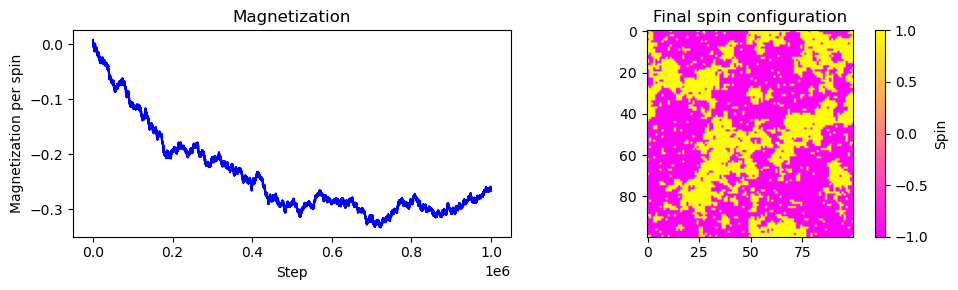

In [4]:
steps = 1000000
size = 100
j = 3e-21
h = 0
temperature = 493.0694412100675 # 220.07 Celsius
model = IsingModel(size, temperature)
model.J = j
model.h = h
print(model)

model.animate(steps, "ising_model_Curie")

model = IsingModel(size, temperature)
model.J = j
model.h = h
model.plot_magnetization(steps)

Experiment 3:

Temperature = 327 Celsius

2D Ising Model with 100x100 spins
T = 600 K
J = 3e-21 Jules
h = 0 Jules
Curie temperature: 493.0694412100675 K
Step 0/1000000 completed.
Step 100000/1000000 completed.
Step 200000/1000000 completed.
Step 300000/1000000 completed.
Step 400000/1000000 completed.
Step 500000/1000000 completed.
Step 600000/1000000 completed.
Step 700000/1000000 completed.
Step 800000/1000000 completed.
Step 900000/1000000 completed.


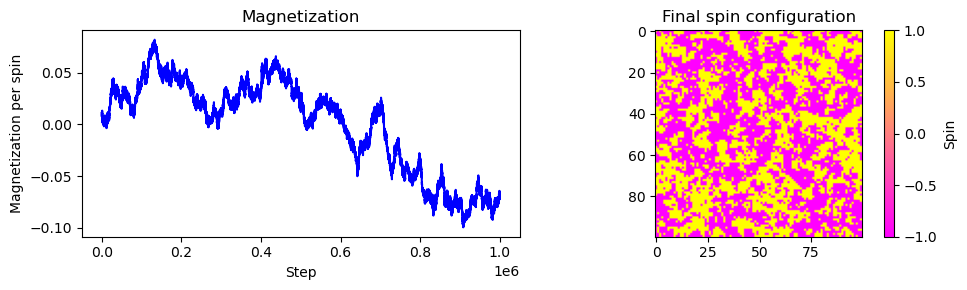

In [6]:
steps = 1000000
size = 100
j = 3e-21
h = 0
temperature = 600 # 327 Celsius
model = IsingModel(size, temperature)
model.J = j
model.h = h
print(model)

model.animate(steps, "ising_model_2")

model = IsingModel(size, temperature)
model.J = j
model.h = h
model.plot_magnetization(steps)